# Импортируем 16-битное монохромное изображение

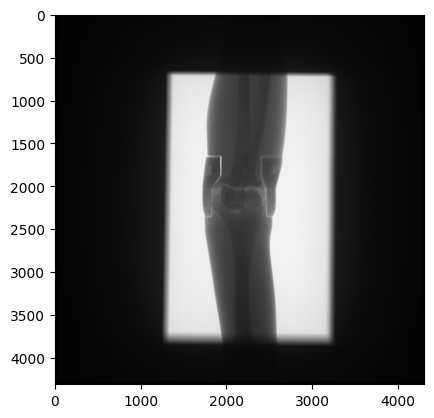

I;16B - тип изображения, (4308, 4308) - размер изображения, формат - TIFF


In [85]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\1.tiff"
imag = Image.open(path_elbow)
plt.imshow(np.asarray(imag), cmap = 'gray')
plt.show()
print(imag.mode, '- тип изображения,', imag.size, '- размер изображения,', 'формат -', imag.format)

Обрезаем тёмные края

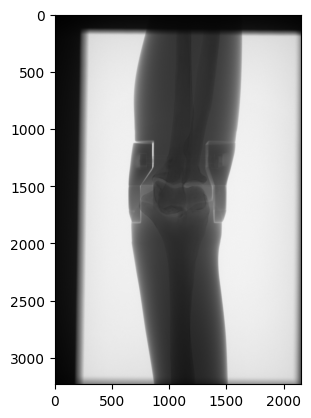

In [86]:
width=imag.width
height=imag.height
alfa=4
beta=8
xleft_base=width/alfa #Границы обрезки
yleft_base=height/beta
xright_base=height-xleft_base
yright_base=height-yleft_base
coordinates_crop = (xleft_base, yleft_base, xright_base, yright_base) #Ось y направлена вниз, ось x вправо
imag_1 = imag.crop(coordinates_crop)
plt.imshow(np.asarray(imag_1), cmap = 'gray')

Расчёт шума и среднего в выделенной области

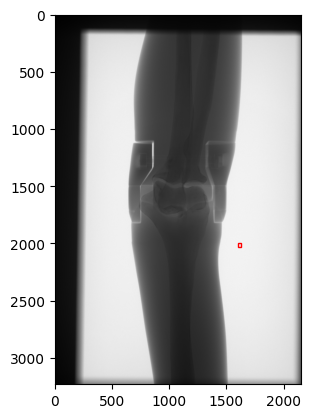

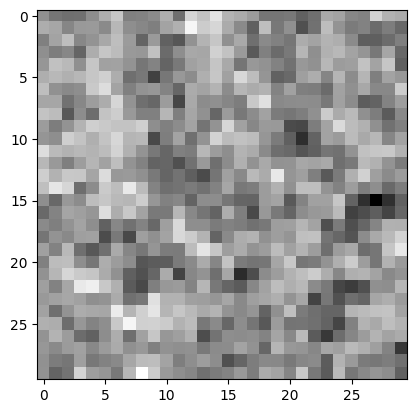

9743.59 - среднее значение
 51.08 Среднее квадратичное отклонение
 190.74 - отношение сигнал/шум


In [87]:
from matplotlib import patches
xleft=1600 #Координаты левого верхнего угла прямоугольника
yleft=2000
b_square=30 #Размеры квадрата
xright=xleft+b_square
yright=yleft+b_square
rect = patches.Rectangle(
    (xleft, yleft),           # левый верхний угол
    xright - xleft,            # ширина
    yright - yleft,            # высота
    linewidth=1,                # толщина линии
    edgecolor='red',            # цвет границы
    facecolor='none')            # без заливки
fig, ax = plt.subplots()
ax.add_patch(rect) #строим прямоугольник
plt.imshow(np.asarray(imag_1), cmap = 'gray') 
plt.show()
coordinates = (xleft, yleft, xright, yright) # Ось y направлена вниз, ось x вправо
imag_region = imag_1.crop(coordinates) #Выделяем интересуемый нас регион
plt.imshow(np.asarray(imag_region), cmap = 'gray')
plt.show()
oblast=np.asarray(imag_region) #Считаем шум, среднее и СКО
mean=np.mean(oblast)
std=np.std(oblast)
print(round(mean,2), '- среднее значение\n', round(std,2),'Среднее квадратичное отклонение\n',
      round(mean/std,2), '- отношение сигнал/шум')

Теперь посчитаем SNR для пикселей из этой области для каждого из 10 снимков

In [177]:
sredn_var=[]
sredn_mean=[]
for i in range(10):
    path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    imag_region_loop = img.crop(coordinates) #выбор области анализа
    oblast_loop=np.asarray(imag_region_loop)
    mean=np.mean(oblast_loop) #Мат. ожидание
    std=np.std(oblast_loop) #СКО
    var=np.var(oblast_loop) #Дисперсия
    #print(round(mean,2), '- средн.;', round(var,2),'- Дисперсия;', round(mean/std,2), '- SNR')
    print(round(mean,2), '- средн.;', round(var,2),'- Дисперсия;')
    sredn_var.append(round(var,2))
    sredn_mean.append(round(mean,2))
std_sredn_var=round(np.std(sredn_var), 2) #СКО дисперсии области пикселей
mean_sredn_var=round(np.mean(sredn_var), 2) #среднее дисперсии области пикселей
var_sredn_var=round(np.var(sredn_var), 2) #дисперсия дисперсии области пикселей
mean_sredn_mean=round(np.mean(sredn_mean), 2)
print(mean_sredn_var, '- среднее дисперсии;', var_sredn_var,'- Дисперсия дисперсии;', std_sredn_var, '- СКО дисперсии (По всей площади по 10 снимкам)')

9743.59 - средн.; 2609.56 - Дисперсия;
9760.13 - средн.; 3088.76 - Дисперсия;
9786.72 - средн.; 2606.61 - Дисперсия;
9774.22 - средн.; 2755.28 - Дисперсия;
9758.59 - средн.; 3498.18 - Дисперсия;
9765.85 - средн.; 2783.66 - Дисперсия;
9787.63 - средн.; 2840.41 - Дисперсия;
9735.63 - средн.; 3255.71 - Дисперсия;
9781.96 - средн.; 2730.61 - Дисперсия;
9747.79 - средн.; 3252.14 - Дисперсия;
2942.09 - среднее дисперсии; 86342.04 - Дисперсия дисперсии; 293.84 - СКО дисперсии (По всей площади по 10 снимкам)


Построим график дисперсии для всей области

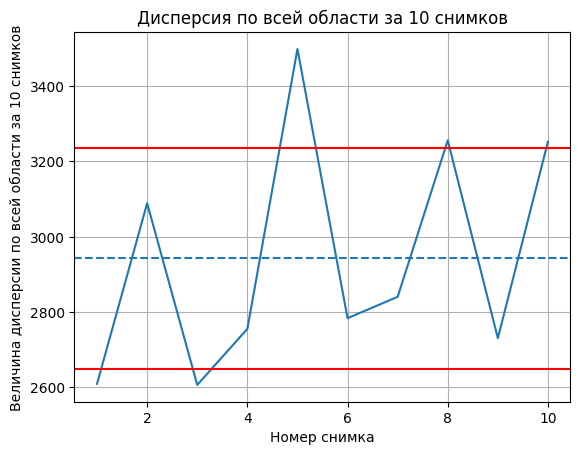

In [178]:
k_graph=[]
for k in range(10): #Ось X
    k_graph.append(k+1)
std_var_pixel=np.std(sredn_var) #СКО дисперсии
mean_var_pixel=np.mean(sredn_var) #Среднее значение дисперсии
plt.plot(k_graph, sredn_var)
plt.axline((1, mean_var_pixel), (10, mean_var_pixel), linestyle='--')  #Среднее значение дисперсии
plt.axline((1, mean_var_pixel+std_var_pixel), (10, mean_var_pixel+std_var_pixel), color='Red') #+ СКО
plt.axline((1, mean_var_pixel-std_var_pixel), (10, mean_var_pixel-std_var_pixel), color='Red') #- СКО
plt.grid()
plt.xlabel('Номер снимка')
plt.ylabel('Величина дисперсии по всей области за 10 снимков')
plt.title('Дисперсия по всей области за 10 снимков')
plt.show()

Параметры для отдельных пикселей

In [184]:
pixel_brightness=[]
pixel_brightness_total=[]
pixel_mean_var=[]
for i in range(10):
    path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\" + str(i+1) + ".tiff"
    img = Image.open(path_elbow)
    img = img.crop(coordinates_crop) #Обрезка тёмных краёв
    imag_region_loop = img.crop(coordinates) #выбор области анализа
    oblast_loop=np.asarray(imag_region_loop)
    pixel_brightness=[]
    for k in range(b_square):
        for j in range(b_square):
            pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
    pixel_brightness_total.append(pixel_brightness)
pixel_brightness_total=list(map(list, zip(*pixel_brightness_total))) #Транспонирование списка списков
for f in range(len(pixel_brightness_total)): #Cчитаем список Среднего и Дисперсии каждого пикселя за 10 снимков
    mean_pixel=int(np.mean(pixel_brightness_total[f])) #среднее значение пикселя
    var_pixel=int(np.var(pixel_brightness_total[f])) #дисперсия пикселя
    pixel_mean_var.append([mean_pixel,var_pixel]) #СРеднее и дисперсия пикселя за 10 снимков
pixel_mean_var=list(map(list, zip(*pixel_mean_var))) #Транспонируем, чтобы построить график


Построим график дисперсии для всех пикселей из выбранной линии

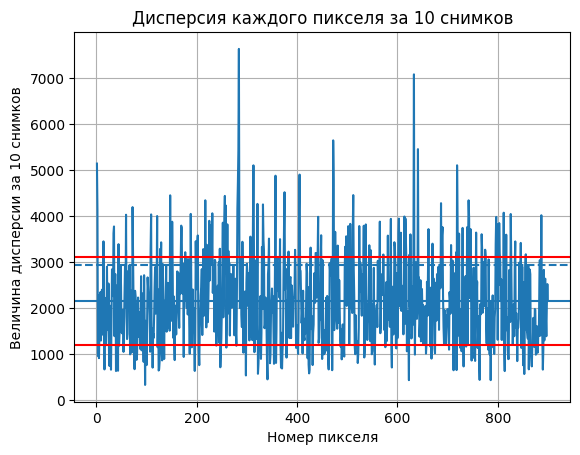

2149 - среднее дисперсии; 926947 - Дисперсия дисперсии; 962 - СКО дисперсии
2942 - средняя дисперсия по всему квадрату за 10 снимков (пунктир);


In [185]:
k_graph=[]
for k in range(b_square**2): #Ось X
    k_graph.append(k+1)
std_var_pixel=np.std(pixel_mean_var[1]) #СКО дисперсии
mean_var_pixel=np.mean(pixel_mean_var[1]) #Среднее значение дисперсии
plt.plot(k_graph, pixel_mean_var[1])
plt.axline((1, mean_var_pixel), (b_square**2, mean_var_pixel))  #Среднее значение дисперсии
plt.axline((1, mean_var_pixel+std_var_pixel), (b_square**2, mean_var_pixel+std_var_pixel), color='Red') #+ СКО
plt.axline((1, mean_var_pixel-std_var_pixel), (b_square**2, mean_var_pixel-std_var_pixel), color='Red') #- СКО
plt.axline((1, mean_sredn_var), (b_square**2, mean_sredn_var), linestyle='--') #Средняя дисперсия по всему выбранному квадрату за 10
plt.grid()
plt.xlabel('Номер пикселя')
plt.ylabel('Величина дисперсии за 10 снимков')
plt.title('Дисперсия каждого пикселя за 10 снимков')
plt.show()
print(int(mean_var_pixel), '- среднее дисперсии;', int(np.var(pixel_mean_var[1])),'- Дисперсия дисперсии;', int(std_var_pixel), '- СКО дисперсии')
print(int(mean_sredn_var), '- средняя дисперсия по всему квадрату за 10 снимков (пунктир);')

То же самое для средней яркости для всех пикселей

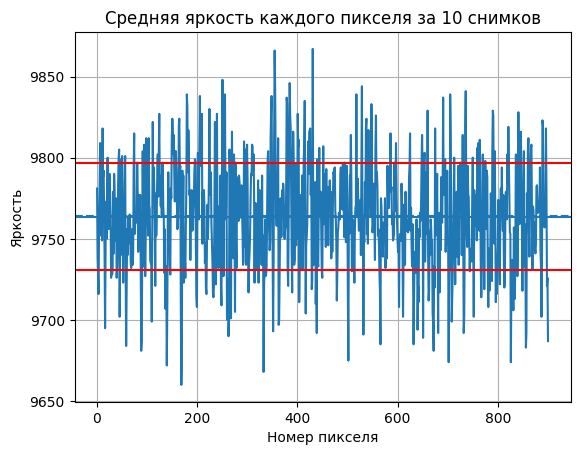

9763 - среднее среднего; 926947 - Дисперсия среднего; 33 - СКО среднего
9764 - среднее среднее по всему квадрату за 10 снимков (пунктир);


In [186]:
k_graph=[]
for k in range(b_square**2): #Ось X
    k_graph.append(k+1)
std_var_pixel=np.std(pixel_mean_var[0]) #СКО среднего
mean_var_pixel=np.mean(pixel_mean_var[0]) #Среднее значение среднего
plt.plot(k_graph, pixel_mean_var[0])
plt.axline((1, mean_var_pixel), (b_square**2, mean_var_pixel))  #Среднее значение среднего
plt.axline((1, mean_var_pixel+std_var_pixel), (b_square**2, mean_var_pixel+std_var_pixel), color='Red') #+ СКО
plt.axline((1, mean_var_pixel-std_var_pixel), (b_square**2, mean_var_pixel-std_var_pixel), color='Red') #- СКО
plt.axline((1, mean_sredn_mean), (b_square**2, mean_sredn_mean), linestyle='--') #Среднее по всему выбранному квадрату за 10 снимков
plt.grid()
plt.xlabel('Номер пикселя')
plt.ylabel('Яркость')
plt.title('Средняя яркость каждого пикселя за 10 снимков')
plt.show()
print(int(mean_var_pixel), '- среднее среднего;', int(np.var(pixel_mean_var[1])),'- Дисперсия среднего;', int(std_var_pixel), '- СКО среднего')
print(int(mean_sredn_mean), '- среднее среднее по всему квадрату за 10 снимков (пунктир);')

Построим график для области 3х3

In [194]:
import math
obl_side=3 #Размер области
k_3=0
j_3=0
while k_3 < math.floor(b_square/obl_side):
    while j_3 < math.floor(b_square/obl_side):
        pixel_brightness=[]
        pixel_brightness_total=[]
        pixel_mean_var=[]
        for i in range(10):     
            path_elbow="C:\\Users\\lkond\\Destkop\\Python\\elbow\\16_bit\\" + str(i+1) + ".tiff"
            img = Image.open(path_elbow)
            img = img.crop(coordinates_crop) #Обрезка тёмных краёв
            imag_region_loop = img.crop(coordinates) #выбор области анализа
            oblast_loop=np.asarray(imag_region_loop)
            pixel_brightness=[]
            for k in range(3):
                for j in range(3):
                    pixel_brightness.append(int(oblast_loop[j][k])) #Выбор пикселя, считываем его яркость
            pixel_brightness_total.append(pixel_brightness)
        pixel_brightness_total=list(map(list, zip(*pixel_brightness_total))) #Транспонирование списка списков
        for f in range(len(pixel_brightness_total)): #Cчитаем список Среднего и Дисперсии за 10 снимков
            mean_pixel=int(np.mean(pixel_brightness_total[f])) #среднее значение
            var_pixel=int(np.var(pixel_brightness_total[f])) #дисперсия
            pixel_mean_var.append([mean_pixel,var_pixel]) #СРеднее и дисперсия за 10 снимков
        pixel_mean_var=list(map(list, zip(*pixel_mean_var))) #Транспонируем, чтобы построить график

SyntaxError: invalid decimal literal (3029335769.py, line 2)

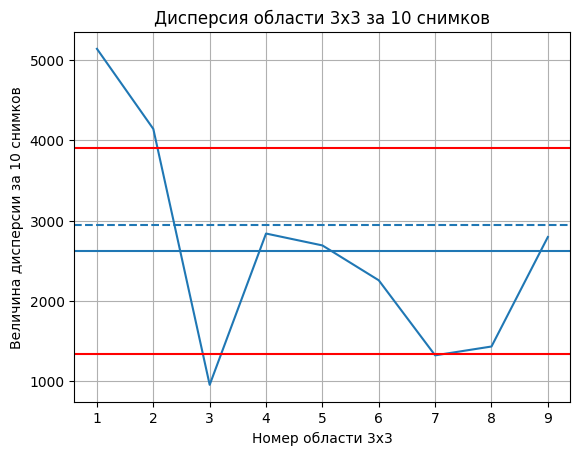

2618 - среднее дисперсии; 1636620 - Дисперсия дисперсии; 1279 - СКО дисперсии
2942 - средняя дисперсия по всему квадрату за 10 снимков (пунктир);


In [192]:
k_graph=[]
for k in range(3*3): #Ось X
    k_graph.append(k+1)
std_var_pixel=np.std(pixel_mean_var[1]) #СКО дисперсии
mean_var_pixel=np.mean(pixel_mean_var[1]) #Среднее значение дисперсии
plt.plot(k_graph, pixel_mean_var[1])
plt.axline((1, mean_var_pixel), (3*3, mean_var_pixel))  #Среднее значение дисперсии
plt.axline((1, mean_var_pixel+std_var_pixel), (3*3, mean_var_pixel+std_var_pixel), color='Red') #+ СКО
plt.axline((1, mean_var_pixel-std_var_pixel), (3*3, mean_var_pixel-std_var_pixel), color='Red') #- СКО
plt.axline((1, mean_sredn_var), (3*3, mean_sredn_var), linestyle='--') #Средняя дисперсия по всему выбранному квадрату за 10
plt.grid()
plt.xlabel('Номер области 3х3')
plt.ylabel('Величина дисперсии за 10 снимков')
plt.title('Дисперсия области 3х3 за 10 снимков')
plt.show()
print(int(mean_var_pixel), '- среднее дисперсии;', int(np.var(pixel_mean_var[1])),'- Дисперсия дисперсии;', int(std_var_pixel), '- СКО дисперсии')
print(int(mean_sredn_var), '- средняя дисперсия по всему квадрату за 10 снимков (пунктир);')

100